In [9]:
import pandas as pd

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL SHUFFLED/qasa_shuffled_iris_100.csv"
df = pd.read_csv(path)

In [12]:
df

,question,context,correct_answer,iris_answer,Rouge1,Rouge2,RougeL,Bleu,Chrf,ChrfPlus,...,BEM,Bart,Prometheus,Faithfullness,Relevancy,Correctness,RSim,Consistency,TSim,LLM
0,How do these automated metrics for human prefe...,The ultimate aim of language technology is to ...,The automated metrics that are mentioned while...,To increase the resolution of the feature maps...,0.066667,0.000000,0.066667,0.556946,17.691064,14.288626,...,0.038515,0.002462,1,0.000000,0.746944,0.183592,0.734266,0.0,0.0,0.0
1,What does non-differentiable mean here? If the...,The ultimate aim of language technology is to ...,A formal definition of non-differentiability h...,Sure! Here's my answer:\n\nPretrained Deep Neu...,0.000000,0.000000,0.000000,0.000000,7.788761,5.841571,...,0.045437,0.000960,1,1.000000,0.744107,0.487622,0.750313,0.0,0.0,0.0
2,Why is the action space of language modeling p...,Language generation action spaces are orders o...,The action space for language modeling is equa...,A task is a set of observations and correspond...,0.130435,0.017544,0.108696,0.930283,24.036746,20.730816,...,0.052608,0.010306,1,0.750000,0.710825,0.565061,0.760168,0.5,0.0,0.0
3,What do the equations for Q-value and value re...,RL4LMs supports fine-tuning and training LMs f...,Q and V are mathematically expressed as: V_{t}...,The various hyperparameters used in the grid s...,0.105263,0.000000,0.105263,0.425912,18.836511,17.377806,...,0.044096,0.007358,1,0.000000,0.750772,NaN,0.720472,0.0,0.0,0.0
4,Why is it helpful to mask out less relevant to...,"Specifically, NLPOmaintains a masking policy \...",The authors hypothesize that their dynamic mas...,KG-Classifier affects zero-shot fusion by enab...,0.109589,0.000000,0.082192,0.750003,23.102172,19.177323,...,0.045759,0.002129,1,0.666667,0.770962,0.188624,0.754496,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Why did the authors use a mix of 1x1 and 3x3 f...,Strategy 2. Decrease the number of input chann...,Authors used a mix of 1x1 and 3x3 filters in t...,3D,0.000000,0.000000,0.000000,0.000000,0.429553,0.286369,...,0.040373,0.001062,1,NaN,0.841556,0.786709,0.746828,0.0,0.0,0.0
96,What is the total number of filters in squeeze...,We define the Fire module as follows.A Fire mo...,s1x1 is the number of filters in the squeeze l...,Humans' one-shot learning ability cannot be di...,0.130841,0.013889,0.130841,0.552065,8.992601,8.517161,...,0.043280,0.018904,1,0.000000,0.715606,0.560422,0.741884,0.0,0.0,0.0
97,The Caffe framework does not natively support ...,\bulletSo that the output activations from 1x1...,The additional cost of using 2 convolutional l...,The GATs work well without any assumption of n...,0.141414,0.000000,0.141414,0.871668,26.255130,22.459114,...,0.043236,0.008110,1,NaN,0.713194,0.686165,0.744609,0.0,0.0,0.0
98,Did the authors use AlexNet for evaluation of ...,We now turn our attention to evaluating Squeez...,"Yes, as told by authors that they used AlexNet...",Active Units (AU) refer to the units or dimens...,0.196078,0.035714,0.156863,1.854070,17.595374,15.472165,...,0.072984,0.011992,1,NaN,0.711814,0.484745,0.738939,0.0,0.0,0.0


In [13]:
df.columns

Index(['question', 'context', 'correct_answer', 'iris_answer', 'Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM'],
      dtype='object')

In [14]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
pearson_correlation_matrix = selected_columns_df.corr()
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

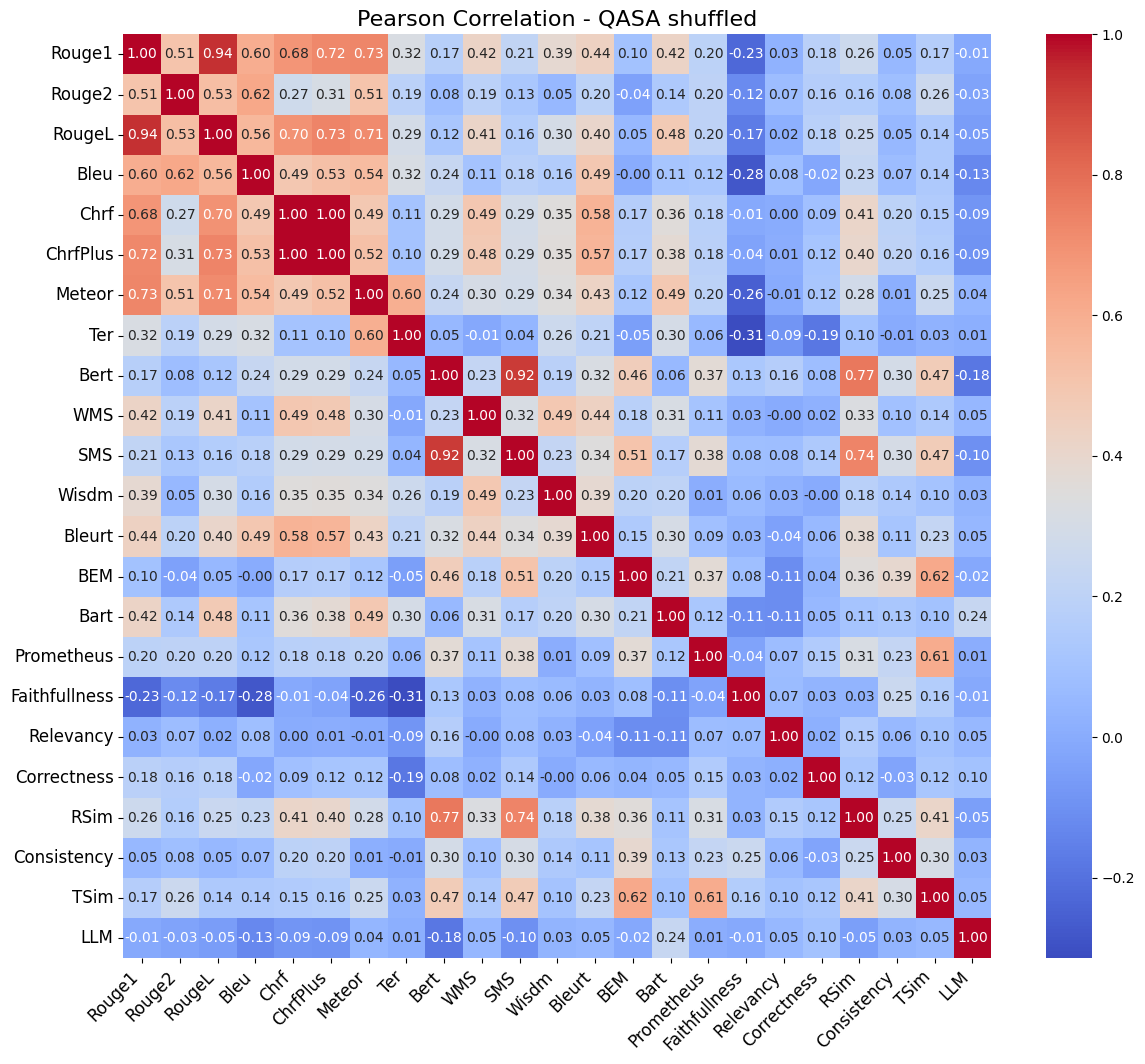

In [15]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Pearson Correlation - QASA shuffled', fontsize=16)  # Adjust title size
plt.show()

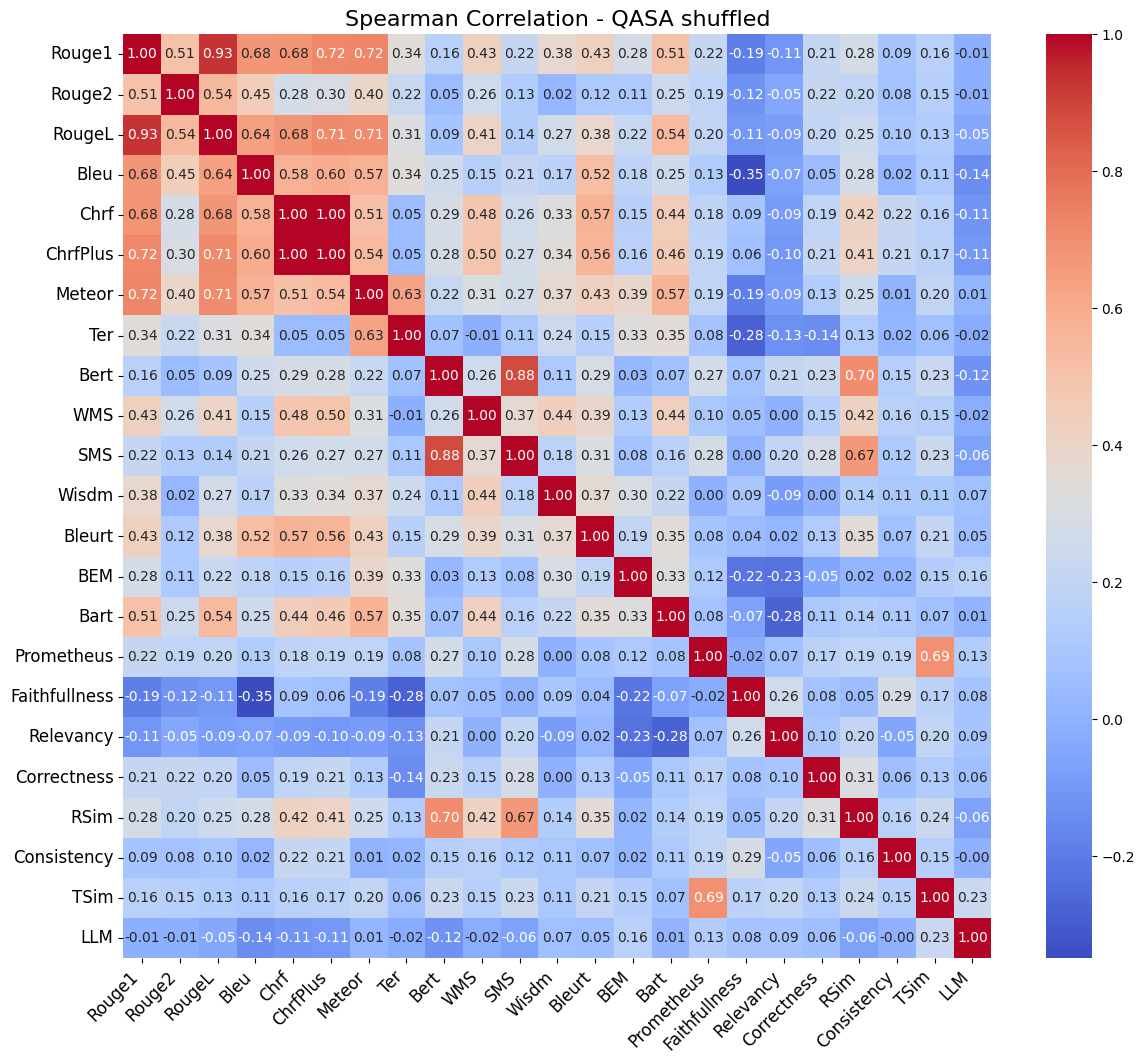

In [16]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Spearman Correlation - QASA shuffled', fontsize=16)  # Adjust title size
plt.show()